# ASSIGNMENT #1: Script to plot global temp

by Daniel Horton, Feb 2017; mod to Python: Stacy, June 2019

daniel.horton@northwestern.edu

References: 

#### Objectives: Learn how to explore netCDF files using python, learn to use python map plotting libraries, 
#####  Bonus challenge questions require manipulation of data, recommended to try and we can go over your attempts.


## Libraries

Import libraries -> make sure these are available in a conda environment or in your computer

You can import specific functions from a library by coding: from <LIB> import <FUNC> (as seen from netCDF4 import Dataset)

#### File I/O

There are two ways to explore netCDF files -- by netCDF or by xarray. 

Learn both, choose your favorite. Understanding both is important so you can look up any answer.

Advantage of netCDF4 library -- more straight forward, variables are easier to pull BUT difficult to setup correctly on your computer; advantage of xarray -- faster, more ubiquitous

In [1]:
import xarray as xr; from netCDF4 import Dataset

/home/iac6311/.conda/envs/tutorial/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/iac6311/.conda/envs/tutorial/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


#### Plotting

Global plotting can be done by cartopy or Basemap. Basemap is being depreciated, learn to love cartopy.

In [2]:
import cartopy.crs as ccrs

Matplotlib is the classic plotting tool, honorable mention to Seaborn which can tweak matplotlib aesthetics.

In [3]:
import matplotlib.pyplot as plt

#### Array handling

numpy and pandas are a classic way to handle arrays. Pandas is slower but gives you a tabular format of data, easy to visualize. Numpy is faster, acts more like a list. Both reference each variable slightly differently -- understand the difference. Being able to switch between numpy and pandas will be helpful.

In [4]:
import numpy as np; import pandas as pd

## User Input

Directory and filenames

In [5]:
file_in ="/projects/b1045/cmip/CMIP5/NCL_Practice/tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc"

Load in file by using NetCDF4

In [6]:
NC=Dataset(file_in); DS=xr.open_dataset(file_in)

# Examine difference and similarities between netcdf formatted Dataset and xarray dataset
print(NC); print(DS)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    institution: NSF/DOE NCAR (National Center for Atmospheric Research) Boulder, CO, USA
    institute_id: NSF-DOE-NCAR
    experiment_id: rcp85
    source: CESM1-WACCM
    model_id: CESM1-WACCM
    forcing: Sl GHG SS Ds SA BC MD OC Oz AA
    parent_experiment_id: historical
    parent_experiment_rip: r2i1p1
    branch_time: 20.0
    contact: cesm_data@ucar.edu
    comment: CESM home page: http://www.cesm.ucar.edu
    references: Marsh, D., et.al. 2012: WACCM4 simulations of atmospheric trends from 1850 to present. See also http://www.cesm.ucar.edu/publications
    initialization_method: 1
    physics_version: 1
    tracking_id: d513bfea-70b9-4a23-b1cb-0b635741b105
    acknowledgements: The CESM project is supported by the National Science Foundation and the Office of Science (BER) of the U.S. Department of Energy. NCAR is sponsored by the National Science Foundation. Computing resources w

##### What is difference between NC.variables and DS.variables? Can you call a variable from each?

_Hint: look at what variables are available easily by printing_ `NC.variables.keys()`


Pulling in top 10 timesteps from netCDF

What are the units? What do these steps mean? Are the values different? 

In [7]:
NC['time'][0:20]; DS['time'][0:20]

<xarray.DataArray 'time' (time: 20)>
array([cftime.DatetimeNoLeap(2006, 1, 16, 12, 0, 0, 0, 5, 16),
       cftime.DatetimeNoLeap(2006, 2, 15, 0, 0, 0, 0, 0, 46),
       cftime.DatetimeNoLeap(2006, 3, 16, 12, 0, 0, 0, 1, 75),
       cftime.DatetimeNoLeap(2006, 4, 16, 0, 0, 0, 0, 4, 106),
       cftime.DatetimeNoLeap(2006, 5, 16, 12, 0, 0, 0, 6, 136),
       cftime.DatetimeNoLeap(2006, 6, 16, 0, 0, 0, 0, 2, 167),
       cftime.DatetimeNoLeap(2006, 7, 16, 12, 0, 0, 0, 4, 197),
       cftime.DatetimeNoLeap(2006, 8, 16, 12, 0, 0, 0, 0, 228),
       cftime.DatetimeNoLeap(2006, 9, 16, 0, 0, 0, 0, 3, 259),
       cftime.DatetimeNoLeap(2006, 10, 16, 12, 0, 0, 0, 5, 289),
       cftime.DatetimeNoLeap(2006, 11, 16, 0, 0, 0, 0, 1, 320),
       cftime.DatetimeNoLeap(2006, 12, 16, 12, 0, 0, 0, 3, 350),
       cftime.DatetimeNoLeap(2007, 1, 16, 12, 0, 0, 0, 6, 16),
       cftime.DatetimeNoLeap(2007, 2, 15, 0, 0, 0, 0, 1, 46),
       cftime.DatetimeNoLeap(2007, 3, 16, 12, 0, 0, 0, 2, 75),
       cftim

**Note:** NC -- days since 2005-01-01; DS -- cftimeDatetime objects

Pull February 2066. How many values are in Feb. 2066? How would you do this with netCDF? Bonus points for writing out netCDF operations

In [8]:
feb66=DS.sel(time=slice('2066-02-01','2066-02-28'))
feb66_avg=feb66.mean(dim='time') 

Our variables separated out. We don't really need to do this, could just keep feb66_avg and reference the lat/lon/temps. But this is just for clarity. 

In [9]:
lat= feb66_avg.lat
lon= feb66_avg.lon
tas= feb66_avg.tas

Our variables separated out using netCDF. Again, just for clarity.

In [10]:
latNC= NC['lat'][:]
lonNC= NC['lon'][:]
tasNC= NC['tas'][:] # --> note this all the temps in all 1128 time steps. To get february, you need to find the index of february. then you can call tasNC[index_february2066] where index_february2066 is an integer. I asked you to do this earlier in a bonus question.

##### !! Bonus challenge question -- change temperature from Kelvin to celsius!

## Plotting

Set map projection here. Check out what different map projections are. This matters because lat/lon variables are stored in different ways (-180 to 180 vs 0 360 for lon values), so you could get an error. This could also skew the information. Learn more about map projections through your own research!

In [11]:
#Projection for plot
projection= ccrs.PlateCarree(central_longitude=255);
# Data projection  -- these are different!
data_crs = ccrs.PlateCarree()

/home/iac6311/.conda/envs/tutorial/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  s)


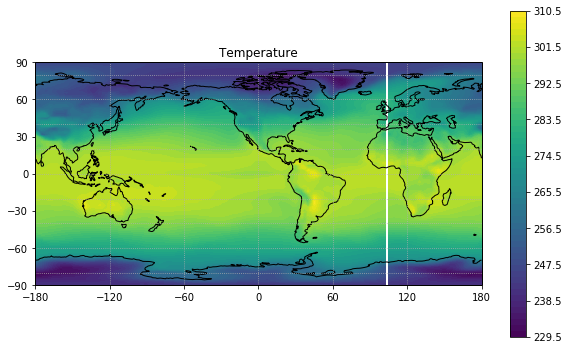

In [12]:
# Open figure object
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

#There are two ways to plot using contourf using lat lon. You can make a grid using lat lon to get the same size matrix as the data, then tell contourf the latlon=True
# For example: 
#xx,yy=np.meshgrid(lon,lat)
#cf=ax.contourf(xx,yy,tas,levels=60,latlon=True, transform=data_crs, cbar_kwargs={'label': DS.tas.units})

# Or you can just use the lat lon, no need to put latlon= True. Both look the same, so what is the real difference?
cf=ax.contourf(lon, lat, tas, levels=60, transform=data_crs, cbar_kwargs={'label': DS.tas.units})
plt.colorbar(cf)
ax.set_label(DS.tas.units)

# Add the gridlines, title, colorbar
ax.set_xticks([-180,-120,-60,0, 60, 120, 180], crs= projection)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs= projection)
ax.gridlines(crs=projection,linestyle="dotted")
plt.title("Temperature")

#Save our figure, show our figure! (Must save before showing)
plt.savefig('assignment1_feb66.png')
plt.show()

##### !! Bonus challenge question: What does a different projection look like? Find the weirdest projection and plot the data. Find a subset of the current dataset. Change the color map for the contour plot.